<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Описание данных</a></span></li></ul></li><li><span><a href="#Шаг-1.-Откроем-файл-с-данными-и-изучим-общую-информацию" data-toc-modified-id="Шаг-1.-Откроем-файл-с-данными-и-изучим-общую-информацию-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Шаг 1. Откроем файл с данными и изучим общую информацию</a></span></li><li><span><a href="#Шаг-2.-Подготовим-данные" data-toc-modified-id="Шаг-2.-Подготовим-данные-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Шаг 2. Подготовим данные</a></span></li><li><span><a href="#Шаг-3.-Проведем-исследовательский-анализ-данных" data-toc-modified-id="Шаг-3.-Проведем-исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Шаг 3. Проведем исследовательский анализ данных</a></span></li><li><span><a href="#Шаг-4.-Составим-портрет-пользователя-каждого-региона" data-toc-modified-id="Шаг-4.-Составим-портрет-пользователя-каждого-региона-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Шаг 4. Составим портрет пользователя каждого региона</a></span></li><li><span><a href="#Шаг-5.-Проверим-гипотезы" data-toc-modified-id="Шаг-5.-Проверим-гипотезы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Шаг 5. Проверим гипотезы</a></span></li><li><span><a href="#Шаг-6.-Напишем-общий-вывод" data-toc-modified-id="Шаг-6.-Напишем-общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Шаг 6. Напишем общий вывод</a></span></li></ul></div>

# Сборный проект

### Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру
компьютерные игры. Из открытых источников доступны исторические данные о
продажах игр, оценки пользователей и экспертов, жанры и платформы
(например, Xbox или PlayStation). 

**Цель исследования**:  нужно выявить определяющие успешность
игры закономерности. Это позволит сделать ставку на потенциально популярный
продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы
планируете кампанию на 2017-й.

ESRB (Entertainment Software Rating
Board) — это ассоциация, определяющая возрастной рейтинг компьютерных
игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную
категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для
подростков».

### Описание данных

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating
Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает
им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными.

## Шаг 1. Откроем файл с данными и изучим общую информацию

In [1]:
# импортируем все необходмые для дальнейшего анализа библиотеки

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

import seaborn as sns

from scipy.stats import levene

from scipy import stats as st

import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('C:/Users/fima3/Documents/Практикум Аналитик/Модуль 1/Сборный проект_1/games.csv')

In [2]:
# прочитаем общую инфрмацию по датасету
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
# выведем первые пять строк
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# посмотрим на статистику
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**Вывод**: Открыли файл и изучили общую информацию по датасету Games. Необходимо на следующем этапе исправить названия столбцов, изменить типы данных, заполнить пропуски, где это возможно.

## Шаг 2. Подготовим данные

Исправим названия столбцов - приведем их к нижнему регистру.

In [5]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [6]:
data.columns = data.columns.str.lower()

In [7]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Посмотрим на уникальные значения в столбце с пользовательскими оценками.

In [8]:
data['user_score'].value_counts().reset_index().sort_values(by='index', ascending=False)

,index,user_score
0,tbd,2424
95,9.7,1
93,9.6,2
74,9.5,6
69,9.4,11
...,...,...
84,0.6,2
81,0.5,2
90,0.3,2
85,0.2,2


Заметим, что в столбце с оценкой пользователей присутствует аббревиатура 'tbd', скорее всего это оценка еще неизвестна либо подлежит уточнению, поэтому можно рассмотреть ее как неизвестные значения, т.е. NaN. Эти пропуски не стоит удалять, так как их много. А также приведем все значения в этом столбце к типу float64, и NaN в отличие от 'tbd' не помешает это сделать.

In [9]:
data[data['user_score'] == 'tbd'].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E


In [10]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

In [11]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [12]:
data['user_score'].dtypes

dtype('float64')

Обработаем пропуски в столбцах, где это возможно.
Для начала посчитаем пропуски в колонке `name`

In [13]:
data['name'].isna().sum()

2

Это всего два значения, посмотрим на них.

In [14]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В этих 2 строках известно совсем мало данных, зато много пропусков, и количество строк несущественно, поэтому удалим эти строки.

In [15]:
data = data.dropna(subset=['name'])

In [16]:
data['name'].isna().sum()

0

Посмотрим на пропуски в столбце `year_of_release`

In [17]:
data['year_of_release'].isna().sum()

269

In [18]:
data[data['year_of_release'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


In [19]:
data['year_of_release'].isna().sum()/len(data)

0.016095255190570215

В этом столбце около 1.6 % пропусков. Это довольно мало, и эти данные без года не будут для нас особо информативны в последующем анализе, так что можно их удалить. Пропуски в столбцах `name`, `year_of_release` могли возникнуть во время технического сбоя.

In [20]:
data = data.dropna(subset=['year_of_release'])

Посчитаем пропуски в остальных столбцах.

In [21]:
data['genre'].isna().sum()

0

In [22]:
data['critic_score'].isna().sum()/len(data)

0.5145341765993675

In [23]:
data['user_score'].isna().sum()/len(data)

0.5461566528825104

In [24]:
data['rating'].isna().sum()/len(data)

0.40598394551204087

Доли пропусков в столбцах `critic_score`, `user_score`, `rating` достаточно велики. Удаление такой доли строк может повлиять на результаты и выводы исследования, поэтому удалять их не стоит. Особенно данные по продажам во всех этих строках имеются и пригодятся нам для дальнейшего анализа. Пропуски в этих полях могли возникнуть вследствие человеческого фактора, не все пользователи оценивали игры, либо по техническим причинам данные потерялись при копировании или считывании.

Посмотрим на уникальные значения в столбцах `genre` и `rating`.


In [25]:
data['genre'].value_counts()

Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64

In [26]:
data['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

В этих столбцах нет выделяющихся значений.

Проверим на наличие явных дубликатов.

In [27]:
data.duplicated().sum()

0

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный
столбец.

In [28]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [29]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


**Вывод**: На данном шаге провели предобработку данных: привели названия столбцов к нижнему регистру, изменили типы данных, обработали, где это было возможно, пропуски, которые могли возникнуть по разным причинам: технические сбои или человеческий фактор.

## Шаг 3. Проведем исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы. Для этого построим сводную таблицу, сгруппировав данные по годам.

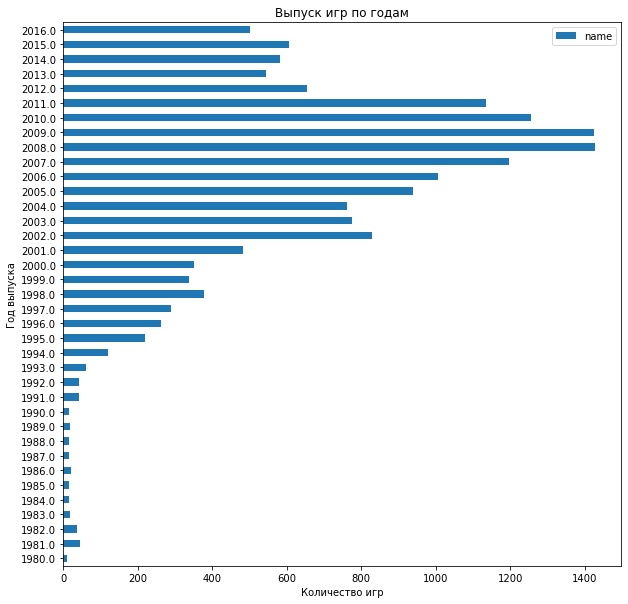

In [30]:
data.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(kind='barh', figsize=(10,10), title='Выпуск игр по годам');
plt.xlabel('Количество игр');
plt.ylabel('Год выпуска');

На графике можно отметить, что с 1980 по 1994 года игр выпускалось очень мало, после идет рост выпуска игр и пик приходится на 2009-2010 гг., а затем идет снова спад, но все равно значения не такие маленькие, как в 80-90е гг. Поэтому данные за 80-90е гг. нам не особо будут интересны для анализа и их можно будет отбросить.

Посмотрим, как менялись продажи по платформам.

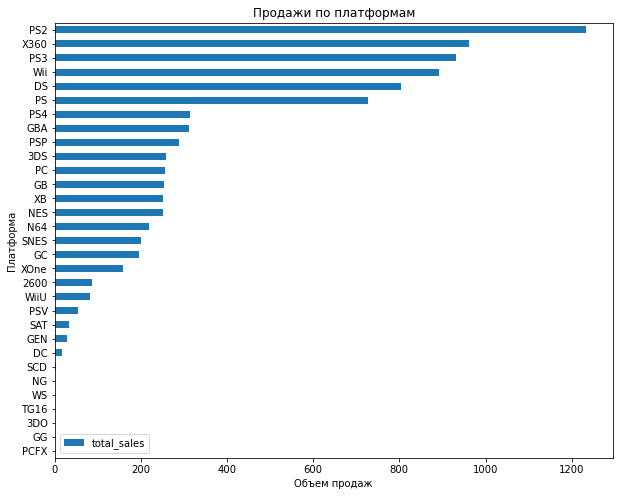

In [31]:
data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales').plot(kind='barh', figsize=(10,8), title='Продажи по платформам');
plt.xlabel('Объем продаж');
plt.ylabel('Платформа');

Мы видим, что у нас есть шесть лидирующих платформ по продажам. Выберем платформы с 
наибольшими суммарными продажами и построим распределение по годам. Для этого возьмем за нижнюю границу глобальных продаж - 600.

In [32]:
data_platform = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').query('total_sales > 600')

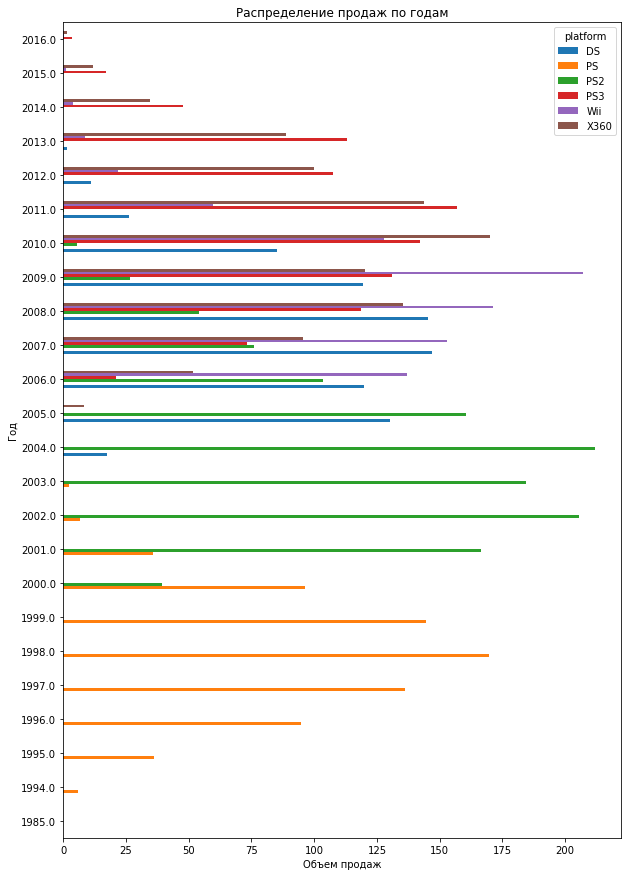

In [33]:
data.query('platform in @data_platform.index').pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').plot(kind='barh', figsize=(10,15), title='Распределение продаж по годам');
plt.xlabel('Объем продаж');
plt.ylabel('Год');

Можно также посмотреть на то, как менялись продажи по каждой из 6 популярных платформ, на следующем графике.

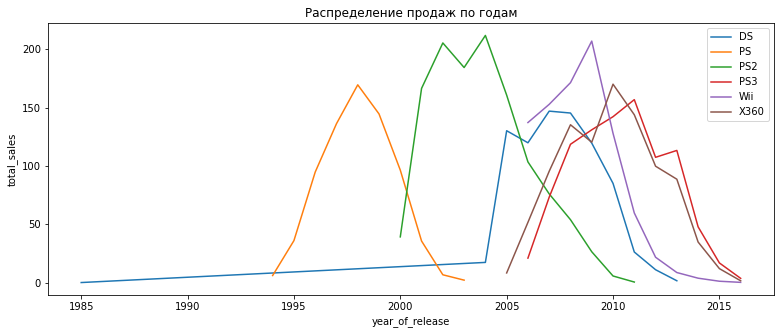

In [34]:
fig, ax = plt.subplots(figsize=(13,5))
for i in data_platform.index:
    data_plot = data.query('platform == @i').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')   
    ax.plot(data_plot.index, data_plot['total_sales'], label = i)
    ax.legend()
    ax.set_title('Распределение продаж по годам')
    plt.xlabel('year_of_release')
    plt.ylabel('total_sales')

 На графиках выше можно прийти к выводу, что примерно за 9-10 лет появляются новые и исчезают старые платформы. Основываясь на этом заключении, возьмем для нашего исследования за актуальный период - период с 2015 года, когда продажи для большинства популярных платформ затухают и появляются новые перспективные платформы. И построим распределение продаж по платформам за этот период.

In [35]:
new_data = data.query('year_of_release > 2014')

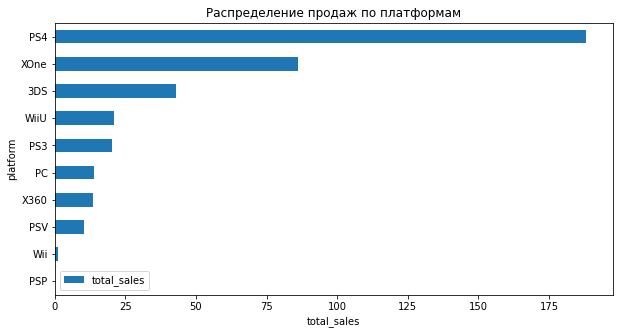

In [36]:
new_data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales').plot(kind='barh', figsize=(10,5), title='Распределение продаж по платформам');
plt.xlabel('total_sales');

По данному графику мы можем сказать, что лидируют по продажам платформы PS4, XOne, 3DS, PS3, X360, WiiU. Проверим, действительно ли продажи по этим платформам растут или же есть платформы, где продажи еще высоки, но уже затухают.

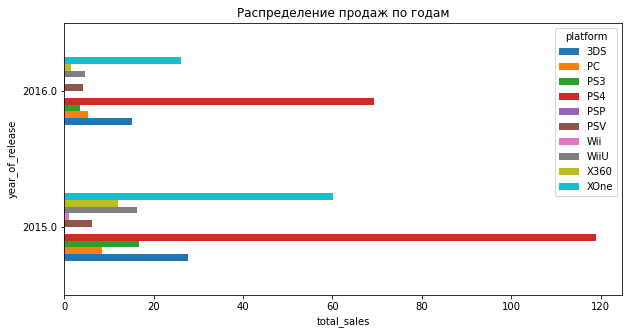

In [37]:
new_data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(kind='barh', figsize=(10,5), title='Распределение продаж по годам');
plt.xlabel('total_sales');

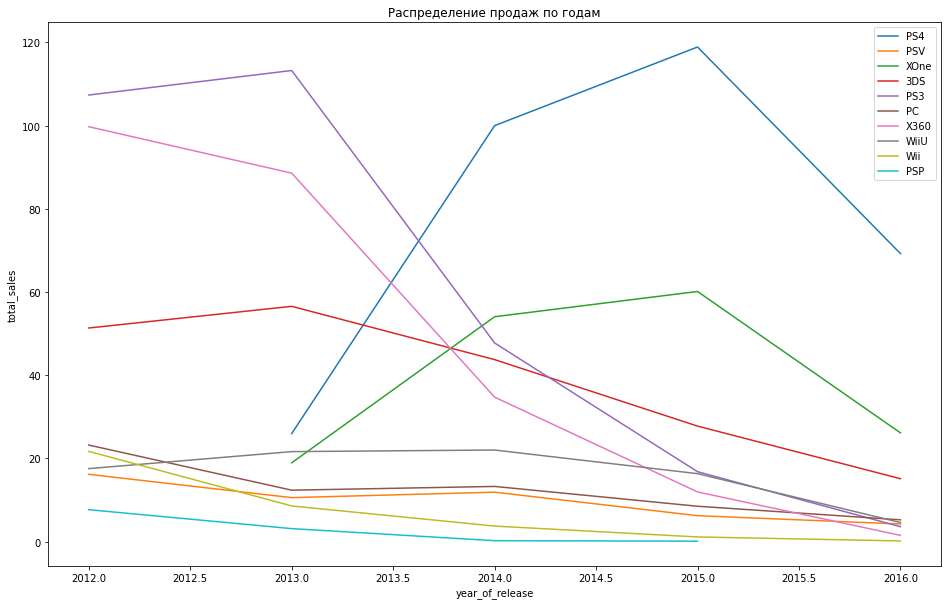

In [38]:
fig, ax = plt.subplots(figsize=(16,10))
for i in new_data['platform'].value_counts().index:
    data_plot = data.query('platform == @i and year_of_release >= 2012').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')   
    ax.plot(data_plot.index, data_plot['total_sales'], label = i)
    ax.legend()
    ax.set_title('Распределение продаж по годам')
    plt.xlabel('year_of_release')
    plt.ylabel('total_sales')

Исходя из графиков выше, можно прийти к выводу, что продажи растут на платформах PS4, XOne (учитывая, что данные за 2016 год неполные), за ними идут платформы 3DS, PC и WiiU, обгоняющие затухающие PS3 и  Х360. Возьмем за потенциально прибыльные платформы - PS4, XOne, 3DS, PC и WiiU.

In [39]:
indexes = ['PS4', 'XOne', '3DS', 'PC', 'WiiU']

Построим график «ящик с усами» по глобальным продажам игр в разбивке по
платформам.

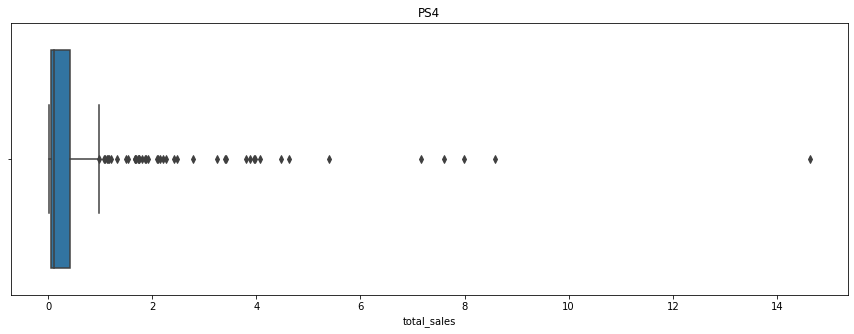

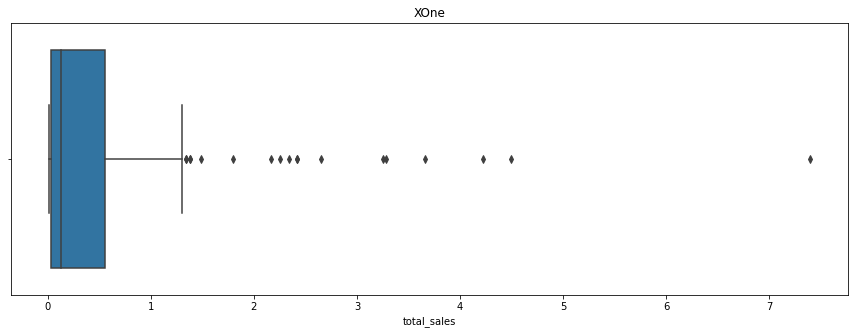

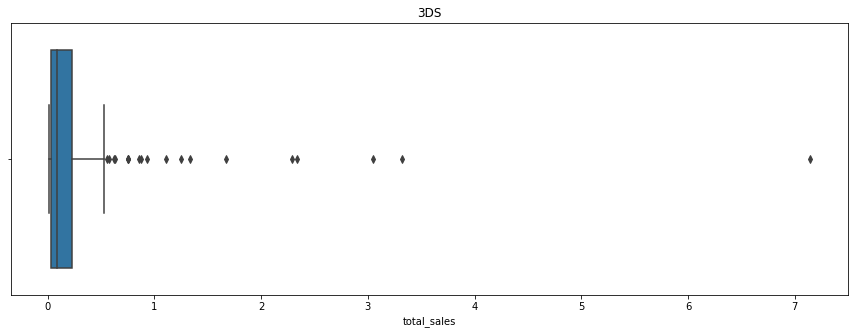

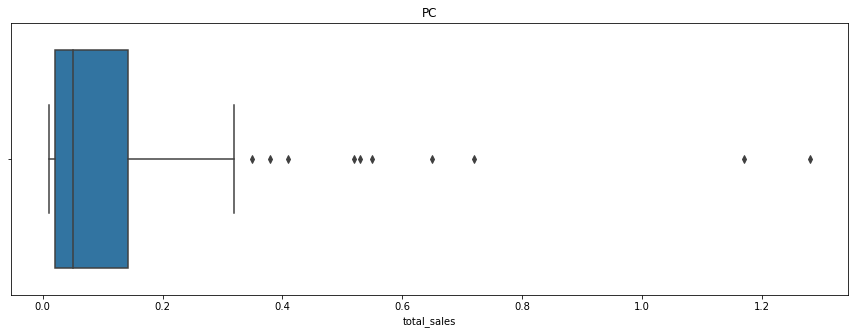

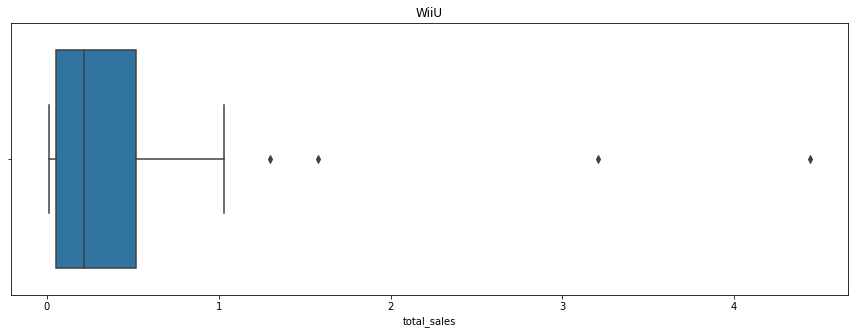

In [40]:
for i in indexes:
    fig, ax = plt.subplots(figsize=(15, 5))
    sns.boxplot(new_data.query('platform == @i')['total_sales'])
    ax.set_title(i);

Можно отметить, что по всем платформам медианное значение проданных копий меньше 0.5 млн., но у PS4 и XOne много выбросов больше 1.5 млн. копий, что оказывает влияние на большие размеры продаж по этим платформам.

Посмотрим, как влияют на продажи внутри популярных платформ
отзывы пользователей и критиков. Построим диаграммы рассеяния и
посчитаем корреляцию между отзывами и продажами. 

In [41]:
def score_sales(plat):
    ''' Функция считает корреляцию между отзывами и продажами для конкретной платформы и строит диаграммы рассеяния'''
    print('Корреляция между отзывами пользователей и продажами для платформы ', plat, ' ', new_data.query('platform == @plat')['total_sales'].corr(new_data.query('platform == @plat')['user_score']))
    print('Корреляция между отзывами критиков и продажами для платформы ', plat, ' ', new_data.query('platform == @plat')['total_sales'].corr(new_data.query('platform == @plat')['critic_score']))
    new_data.query('platform == @plat').plot(x='user_score', y='total_sales', kind='scatter', title='Продажи в зависимости от оценки пользователей ' + plat);
    new_data.query('platform == @plat').plot(x='critic_score', y='total_sales', kind='scatter', title='Продажи в зависимости от оценки критиков '  + plat);

Корреляция между отзывами пользователей и продажами для платформы  PS4   -0.05973845712638212
Корреляция между отзывами критиков и продажами для платформы  PS4   0.3928485555130597
Корреляция между отзывами пользователей и продажами для платформы  XOne   -0.04146733387366272
Корреляция между отзывами критиков и продажами для платформы  XOne   0.4308887458213677
Корреляция между отзывами пользователей и продажами для платформы  3DS   0.1987962700810299
Корреляция между отзывами критиков и продажами для платформы  3DS   0.17757455046092865
Корреляция между отзывами пользователей и продажами для платформы  PC   0.15038053045029068
Корреляция между отзывами критиков и продажами для платформы  PC   0.3773317477241352
Корреляция между отзывами пользователей и продажами для платформы  WiiU   0.36351857248094444
Корреляция между отзывами критиков и продажами для платформы  WiiU   0.31704571176962204


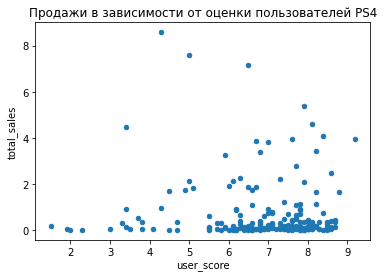

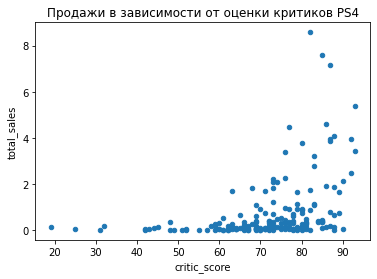

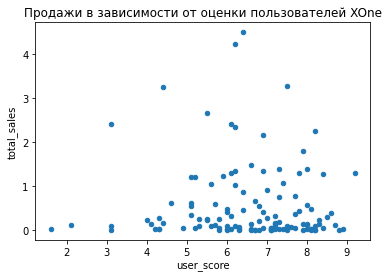

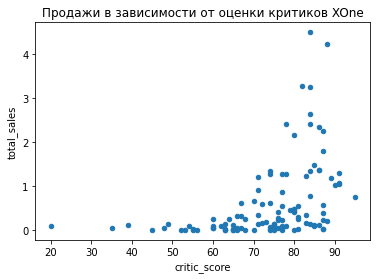

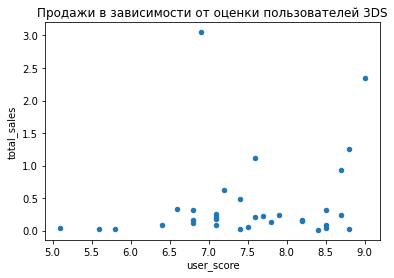

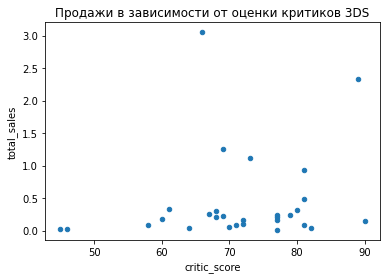

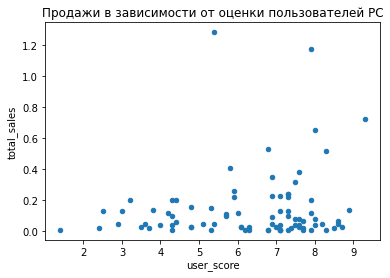

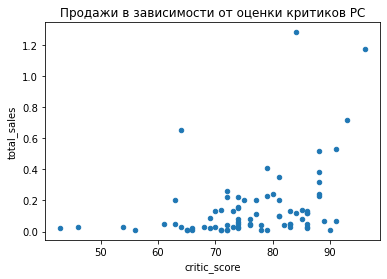

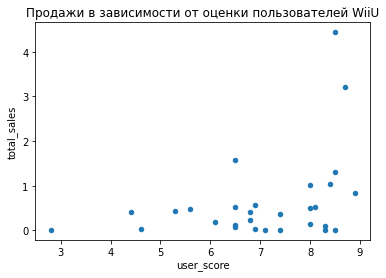

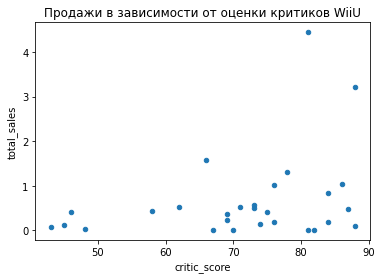

In [42]:
for i in indexes:
    score_sales(i)

По коэффициентым корреляции и графикам можно отметить, что у платформ XOne и PS4 наблюдается линейная зависимость продаж от оценок критиков, однако оценки пользователей незначительно влияют на продажи. Для остальных платформ зависимость от оценок критиков чуть меньше, а для платформы WiiU даже наблюдается связь продаж с оценками пользователей большая, чем с оценками критиков. Но в целом можно сказать, что оценка критиков оказывает большее влияние на продажи, чеи оценка пользователей.

Посмотрим на общее распределение игр по жанрам. 

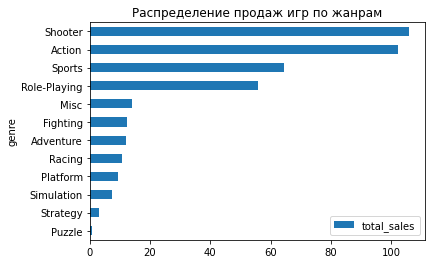

In [43]:
new_data.pivot_table(index='genre', values='total_sales', aggfunc=sum).sort_values(by='total_sales').plot(kind='barh', title='Распределение продаж игр по жанрам');

Cамые прибыльные жанры - это Action, Shooter, Sports и Role-Playing. Выделяются  жанры с высокими 
продажами - Action, Shooter и жанры с низкими продажами - Puzzle, Strategy.

**Вывод**: Провели исследовательский анализ данных и выявили, что продажи по платформам меняются в течение 9-10 лет, то есть новые платформы появляются и старые пропадают за этот срок. То, что было популярным 10 лет назад, уже неактуально на данный момент, поэтому взяли за актуальный период данные с 2015 года и определили 5 потенциально прибыльных платформ - PS4, XOne, 3DS, PC, WiiU. Выявили прямую зависимость продаж от оценки критиков, а также нашли наиболее прибыльные жанры - Action, Shooter, Sports, Role-Playing.

## Шаг 4. Составим портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP, Other):
- Самые популярные платформы (топ-5). 
- Самые популярные жанры (топ-5).
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [44]:
def popular_platform(region):
    '''Функция находит долю продаж отдельного региона от всех продаж и строит график распределения продаж конкретного региона по платформам '''
    new_data.pivot_table(index='platform', values=region, aggfunc='sum').sort_values(by=region).plot(kind='barh', title=region + ' по платформам')
    print('Доля', region, new_data[region].sum() / new_data['total_sales'].sum())

In [45]:
# список регионов
regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

Доля na_sales 0.3814585846401286
Доля eu_sales 0.37178327301970243
Доля jp_sales 0.13419782870928829
Доля other_sales 0.11256031363088058


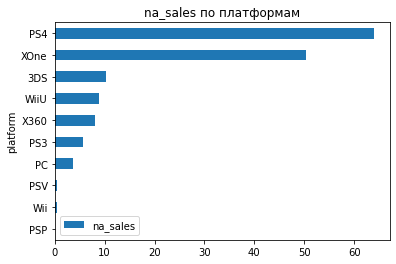

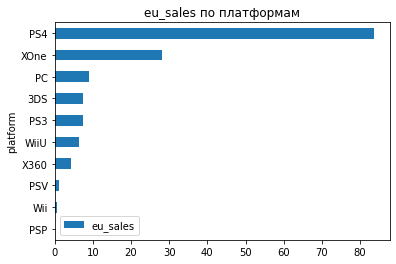

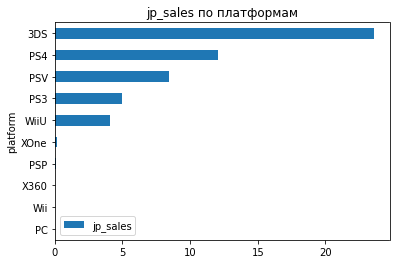

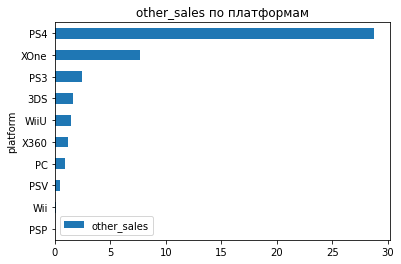

In [46]:
for i in regions:
    popular_platform(i)

Доли продаж в Европе и Северной Америки похожи и являются основными составляющими глобальных продаж. Доли продаж в Японии и остальных странах небольшие. Для пользователей Европы и Северной Америки самыми популярными платформами являются - PS4, XOne, 3DS, в Северной Америки еще популярны WiiU и PS3, а в Европе - PC, PS3 и WiiU догоняет. В других странах похожая ситуация, а вот пользователи в Японии кроме 3DS, PS4, PS3 и WiiU, предпочитают еще PSV.


Определим самые популярные жанры (топ-5) для пользователя каждого региона.

In [47]:
def popular_genre(region):
    '''Функция рисует распределение продаж по жанрам для каждого региона'''
    new_data.pivot_table(index='genre', values=region, aggfunc='sum').sort_values(by=region).plot(kind='barh', title=region + ' по жанрам')

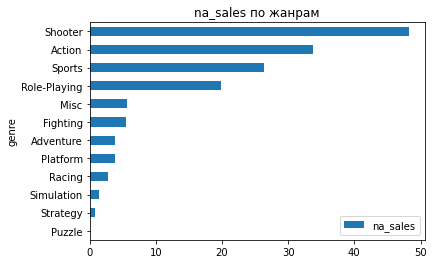

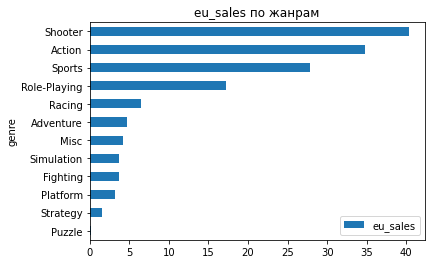

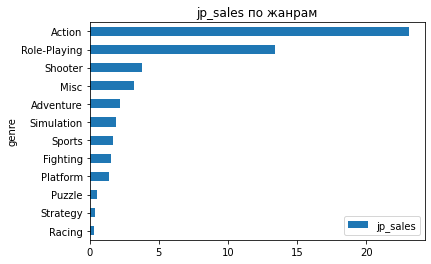

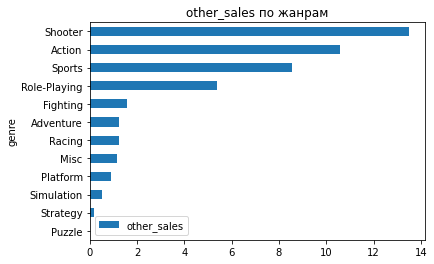

In [48]:
for i in regions:
    popular_genre(i)

Самые популярные жанры игр в Северной Америке, Европе и других странах - Shooter, Action, Sports, Role-Playing, в Северной Америке еще Misc, в Европе - Racing, в остальных странах - Fighting. В Японии лидеры продаж - Action и Role-Paying, затем идут Shooter, Misc и Adventure. Эта разница объясняется культурными различиями между странами Европы, Северной Америки и Японии и при продаже игр в различные регионы необхдимо учитывать эти особенности.

Проверим, влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [49]:
def rating(region):
    '''Функция строит график распределения продаж в конкретном регионе в зависимости от рейтинга ESRB'''
    new_data.pivot_table(index='rating', values=region, aggfunc='sum').sort_values(by=region).plot(kind='barh', title=region + ' ESRB рейтинг')

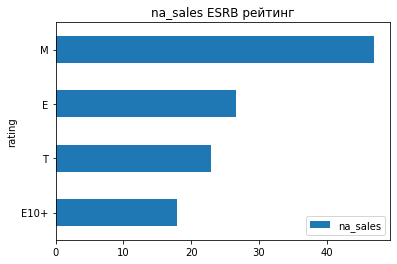

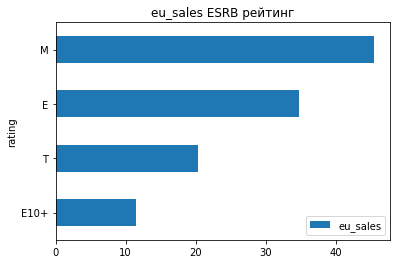

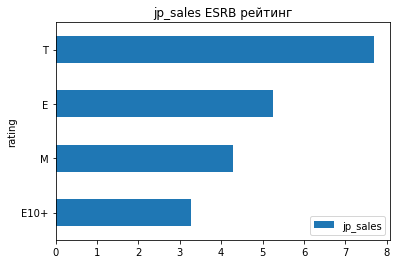

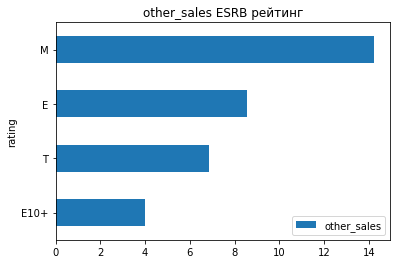

In [50]:
for i in regions:
    rating(i)

По графикам выше отметим, что продажи игр с рейтингом M (для взрослых) лидируют в странах Европы, Северной Америх и остальных странах, за ними идут игры с рейтингами E, T, E10+. А вот в Японии предпочтения пользователей опять отличаются, лидируют игры с рейтингом T (Teen, для подростков),  а за ними уже идут E, M и E10+. Соответственно можно предположить, что рейтинг ESRB влияет на продажи игр в каждом регионе.

**Вывод**:
По проделанным исследованиям можно заключить, что портрет пользователей в Северной Америке, Европе и остальных странах очень схож в отличие от Японии. На это могли повлиять культурные отличия народов. И это необходимо учитывать при планировании рекламных кампаний.

## Шаг 5. Проверим гипотезы

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-
игры) и Sports (англ. «спортивные соревнования») разные.

Сначала проверим гипотезу - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  Для этого за нулевую гипотезу примем утверждение, что средние пользовательские рейтинги платформ Xbox One и PC равны. Альтернативная гипотеза - средние пользовательские рейтинги платформ Xbox One и PC различаются. Чтобы проверить гипотезу о равенстве средних двух генеральных совокупностей для независимых выборок, применим метод scipy.stats.ttest_ind(). Сначала проверим размеры выборок.

In [51]:
data_xbox = new_data.query('platform == "XOne"')
data_pc = new_data.query('platform == "PC"')
len(data_xbox)

167

In [52]:
len(data_pc)

104

 Так как выборки по рейтингам разного размера и можно предположить, что дисперсии у генеральных совокупностей разные — укажем equal_var = False при вызове метода scipy.stats.ttest_ind(). Критический уровень статистической значимости зададим равным 1%.

In [53]:
alpha = .01 # критический уровень статистической значимости

results = st.ttest_ind(data_xbox[~data_xbox['user_score'].isna()]['user_score'], data_pc[~data_pc['user_score'].isna()]['user_score'], equal_var=False)
print('p-значение', results.pvalue)

if results.pvalue <  alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение 0.2946308864003345
Не получилось отвергнуть нулевую гипотезу


In [54]:
data_xbox['user_score'].mean()

6.54214876033058

In [55]:
data_pc['user_score'].mean()

6.296428571428573

Так как p-значение оказалось больше кртического значения, то нулевую гипотезу отвергнуть не удалось, т.е. средние  пользовательские рейтинги платформ Xbox One и PC похожи. Посчитав среднее в выборках мы видим, что средние рейтинги очень близки.

Теперь проверим гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные. Для этого за нулевую гипотезу примем утверждение, что средние пользовательские рейтинги жанров Action и Sports равны. Альтернативная гипотеза - средние пользовательские рейтинги жанров Action и Sports различаются. Чтобы проверить гипотезу о равенстве средних двух генеральных совокупностей для независимых выборок, снова применим метод scipy.stats.ttest_ind(). Сначала проверим размеры и дисперсии выборок.

In [56]:
data_action =  new_data.query('genre == "Action"')
data_sports = new_data.query('genre == "Sports"')

In [57]:
len(data_action)

431

In [58]:
len(data_sports)

107

Размеры выборок значительно отличаются. Сравним дисперсии выборок до проверки гипотез c помощью стат.теста Левене

In [59]:
# статистический тест Левене
stat, p = levene(data_action[~data_action['user_score'].isna()]['user_score'], data_sports[~data_sports['user_score'].isna()]['user_score']) 
p

1.060035862066395e-05

На основании столь малого значения p можно предположить, что дисперсии у выборок разные.  Так как выборки по рейтингам жанров разного размера и можно предположить, что дисперсии у генеральных совокупностей разные — укажем equal_var = False при вызове метода scipy.stats.ttest_ind(). Критический уровень статистической значимости оставим равным 1%.

In [60]:
results = st.ttest_ind(data_action[~data_action['user_score'].isna()]['user_score'], data_sports[~data_sports['user_score'].isna()]['user_score'], equal_var=False)
print('p-значение', results.pvalue)

if results.pvalue <  alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение 5.97163549920592e-10
Отвергаем нулевую гипотезу


In [61]:
data_action['user_score'].mean()

6.8082901554404085

In [62]:
data_sports['user_score'].mean()

5.1987804878048784

Мы отвергли нулевую гипотезу, поэтому можно сделать вывод, что средние пользовательские рейтинги жанров Action и Sports на самом деле разные. Полученные средние значения этих выборок говорят также в пользу альтернативной гипотезы.

**Вывод**:
Проверили две гипотезы и получили, что средние  пользовательские рейтинги платформ Xbox One и PC похожи, а средние пользовательские рейтинги жанров Action и Sports разные

## Шаг 6. Напишем общий вывод

**Вывод**:
В данном проекте мы взяли из открытых источников исторические данные о
продажах игр, оценки пользователей и экспертов, жанры и платформы, предобработали эти данные - заменили названия столбцов, обработали пропуски, где это было необходимо, поменяли типы данных и подготовили данные к дальнейшему анализу. На основании анализа мы выявили определяющие успешность
игры закономерности:
1. платформы меняются каждые 10 лет (примерно за 10 лет появляются новые и пропадают старые платформы)
2. существует линейная зависимость продаж от отзывов критиков
3. также есть зависимость продаж от жанра и рейтинга ESRB
4. в различных регионах могут отличаться предпочтения.

Определив актуальный период для анализа, выявили 5 потенциально успешных платформ по убыванию прибыльности - PS4, XOne, 3DS, PC, WiiU, особенно популярные жанры среди этих платформ -  Action, Shooter, Sports, Role-Playing, рейтинг ESRB в приоритете - M, E. Но необходимо не забывать, что планируя рекламные компании для отдельных регионов надо учитывать их особенности, как например в Японии, надо не забывать о культурных различиях и в жанрах делать упор на - Action и Role-Paying, а предпочтительный рейтинг ESRB - T. 

Исходя из сделанных выводов, мы сможем спланировать более прибыльные рекламные кампании.